# Análise Estatística com Boxplots, Histogramas e Z-scores

Neste notebook, vamos explorar conceitos importantes de estatística descritiva através de exercícios práticos. Você trabalhará com:
- Análise de tendência central e dispersão usando boxplots
- Interpretação de histogramas e cálculo de z-scores
- Uso de tabelas de distribuição normal para cálculo de probabilidades
- Comparação entre conjuntos de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuração inicial

sns.set_style("whitegrid")
plt.style.use("ggplot")
# plt.style.use('seaborn')
%matplotlib inline

## Exercício 1: Análise de Boxplots - Tendência Central e Dispersão


Considere os seguintes conjuntos de dados que representam notas de alunos em três turmas diferentes:

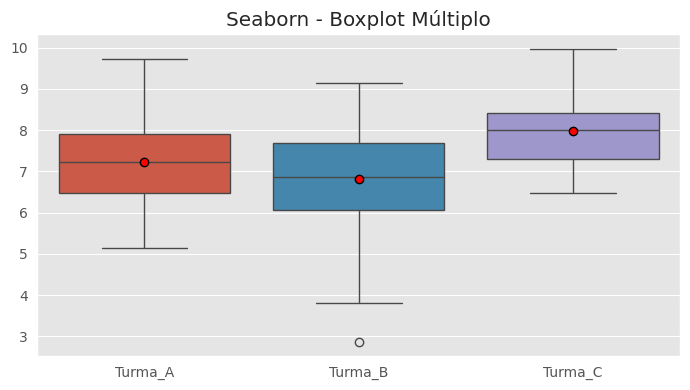

In [5]:
np.random.seed(42)
# Dados das turmas
turma_A = np.random.normal(7.5, 1.2, 50)
turma_B = np.random.normal(6.8, 1.5, 50)
turma_C = np.random.normal(8.0, 0.8, 50)

# Crie um dataframe com as turmas

df = pd.DataFrame({"Turma_A": turma_A, "Turma_B": turma_B, "Turma_C": turma_C})
df
# Plot um boxplot
plt.figure(figsize=(7,4))
sns.boxplot(data=df, showmeans = True,
             meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})
plt.title('Seaborn - Boxplot Múltiplo')

plt.tight_layout()
plt.show()

**Perguntas**:
1. Qual turma apresenta a maior mediana de notas? E a menor?
2. Qual turma tem a maior dispersão nas notas? Justifique observando o boxplot.
3. Há presença de outliers em alguma turma? Se sim, em qual(is)?
4. Com base no boxplot, qual turma você diria que tem o desempenho mais homogêneo?

In [22]:
medianas = df.median()
print(f"Medianas:\n",medianas)
print('\n')
desvios = df.std()
print(f"Desvio padrao:\n",desvios)

#1. Maior = Turma C, Menor = Turma = B
#2 Maior = Turma B tem o box mais largo e bigode mais longo, indicando uma maior variacao nas notas
#3 Sim, Tem um outlier na Turma B
#4 A turma c tem o box mais estreito e bigode curtos, indica que tem menos dispercao.

Medianas:
 Turma_A    7.219026
Turma_B    6.869120
Turma_C    8.013487
dtype: float64


Desvio padrao:
 Turma_A    1.120403
Turma_B    1.311487
Turma_C    0.812331
dtype: float64


## Exercício 2: Análise de Histograma e Cálculo de Z-score


Considere a distribuição de alturas de uma população adulta (em cm):

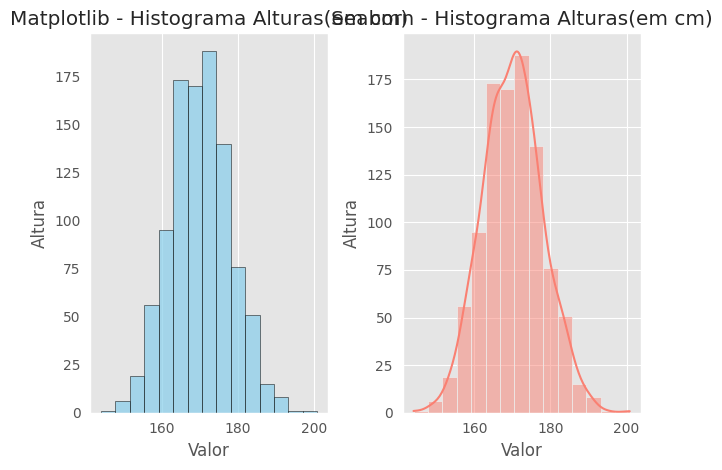

Média: 170.15 cm
Desvio padrão: 7.83 cm
Z-score: 1.90
Z-score 185cm: 1.90
Z-score 160cm: -1.30 Porcentagem: 9.73%
Z-score 165cm: -0.66 Porcentagem: 25.52%
Z-score 175cm: 0.62 Porcentagem: 73.20%
Probabilidade ex 3 = 47.68%
Altura do PErcentil 90 = 180.19


In [30]:
# Dados de altura
np.random.seed(42)
alturas = np.random.normal(170, 8, 1000)

# Plot o histograma
plt.subplot(1, 2, 1)
plt.hist(alturas, bins=15, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Matplotlib - Histograma Alturas(em cm)')
plt.xlabel('Valor')
plt.ylabel('Altura')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.histplot(data=alturas, bins=15, kde=True, color='salmon')
plt.title('Seaborn - Histograma Alturas(em cm)')
plt.xlabel('Valor')
plt.ylabel('Altura')
plt.tight_layout()
plt.show()

# Complete o código para mostrar as Estatísticas descritivas
media = np.mean(alturas)
desvio_padrao = np.std(alturas)
print(f"Média: {media:.2f} cm")
print(f"Desvio padrão: {desvio_padrao:.2f} cm")

z = (185 - media)/desvio_padrao
z1 = (160 - media)/desvio_padrao
z2 = (165 - media)/desvio_padrao
z3 = (175 - media)/desvio_padrao

print(f"Z-score: {z:.2f}")
prob = stats.norm.cdf(z1)*100
prob2 = stats.norm.cdf(z2)*100
prob3 = stats.norm.cdf(z3)*100

print(f"Z-score 185cm: {z:.2f}")
print(f"Z-score 160cm: {z1:.2f} Porcentagem: {prob:.2f}%")
print(f"Z-score 165cm: {z2:.2f} Porcentagem: {prob2:.2f}%")
print(f"Z-score 175cm: {z3:.2f} Porcentagem: {prob3:.2f}%")
prob4 = prob3-prob2
print(f"Probabilidade ex 3 = {prob4:.2f}%")

print(f"Altura do PErcentil 90 = {stats.norm.ppf(0.9,media,desvio_padrao):.2f}")

**Perguntas**:
1. Qual é o z-score para uma altura de 185 cm?
2. Qual a probabilidade de uma pessoa ter altura menor que 160 cm? (Use a tabela Z)
3. Qual a probabilidade de uma pessoa ter altura entre 165 cm e 175 cm?
4. Que altura corresponde ao percentil 90? (Use a tabela Z inversa)

In [ ]:
# 1 - Z-score 185cm: 1.90
# 2 - Z-score 160cm: -1.30 Porcentagem: 9.73%
# 3 - Probabilidade: 47.68%
# 4 - Altura do PErcentil 90 = 180.19cm

## Exercício 3: Comparação entre Conjuntos de Dados usando Z-scores


Considere os seguintes dados de desempenho em duas disciplinas diferentes:

In [38]:
# Dados das disciplinas
np.random.seed(42)
matematica = np.random.normal(6.5, 1.8, 200)
portugues = np.random.normal(7.2, 1.2, 200)

# Crie um dataframe
df = pd.DataFrame({"Matematica":matematica, "Portugues":portugues})
df.head(10)
# Mostre os valores de média e desvio padrão para as duas disciplinas
print("Matemática:")
media_mat = np.mean(matematica)
print(f"Média: {media_mat:.2f}")
desvio_padrao_mat = np.std(matematica)
print(f"Desvio padrão: {desvio_padrao_mat:.2f}\n")

print("Português:")
media_port = np.mean(portugues)
print(f"Média: {media_port:.2f}")
desvio_padrao_port = np.std(portugues)
print(f"Desvio padrão: {desvio_padrao_port:.2f}\n")

z_mat = (8.5 - media_mat)/desvio_padrao_mat
z_port = (7.8 - media_port)/desvio_padrao_port

print(f'Z-score matematica: {z_mat:.2f} Z-score portugues: {z_port:.2f}')

z_mat_5 = (5.0 - media_mat)/desvio_padrao_mat
equivalente = media_port + z_mat_5 * desvio_padrao_port
print(f'Nota equivalente em portugues para nota 5.0 em mat: {equivalente:.2f}')

z_75 = stats.norm.ppf(0.75)
equivalente = media_port + z_75 * desvio_padrao_port
print(f'Nota equivalente em portugues para nota percentil 75 em mat: {equivalente:.2f}')

cv_mat = desvio_padrao_mat/media_mat
cv_port = desvio_padrao_port/media_port
print(f'Coeficiente de variacao Portugues: {cv_port:.2f} Matematica:{cv_mat:.2f}')

Matemática:
Média: 6.43
Desvio padrão: 1.67

Português:
Média: 7.30
Desvio padrão: 1.18

Z-score matematica: 1.24 Z-score portugues: 0.42
Nota equivalente em portugues para nota 5.0 em mat: 6.29
Nota equivalente em portugues para nota percentil 75 em mat: 8.10
Coeficiente de variacao Portugues: 0.16 Matematica:0.26


**Perguntas**:
1. Um aluno tirou 8.5 em Matemática e 7.8 em Português. Em qual disciplina ele se saiu melhor em relação à turma?
2. Qual nota em Português seria equivalente a uma nota de 5.0 em Matemática (em termos de posição relativa)?
3. Se um aluno está no percentil 75 em Matemática, qual seria a nota equivalente em Português?
4. Em qual disciplina há maior variabilidade relativa no desempenho dos alunos?

In [ ]:
# Z-score matematica: 1.24 Z-score portugues: 0.42, se saiu melhor em Matematica
# Nota equivalente em portugues para nota 5.0 em mat: 6.29
# Nota equivalente em portugues para percentil 75 em mat: 8.10
# Coeficiente de variacao Portugues: 0.16 Matematica:0.26, mat tem maior variabilidade relativa

## Exercício 4: Integração de Conceitos - Boxplot, Histograma e Probabilidade


Considere os dados de tempo de entrega (em minutos) de dois restaurantes:

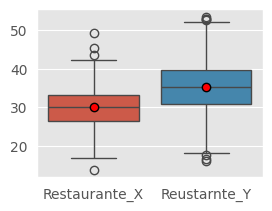

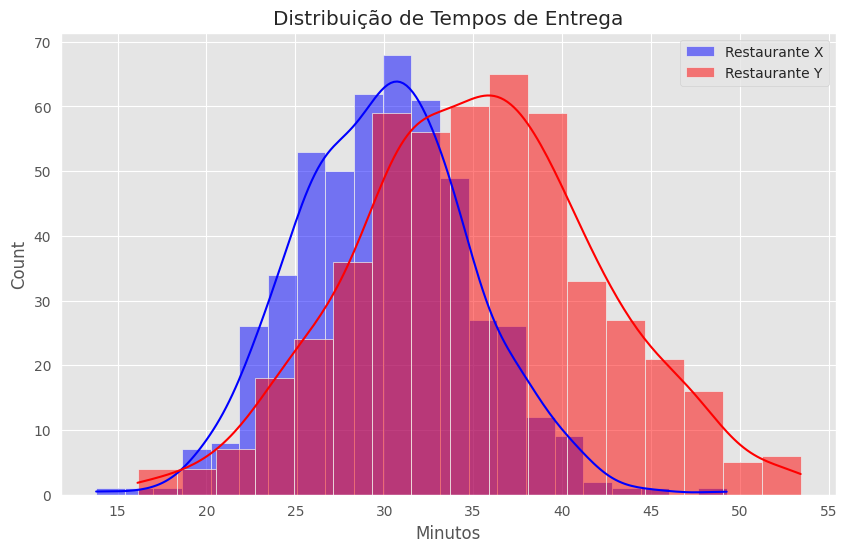

In [39]:
# Dados dos restaurantes
np.random.seed(42)
restaurante_X = np.random.normal(30, 5, 500)
restaurante_Y = np.random.normal(35, 7, 500)

# Cire um Boxplot comparativo entre os restaurantes

df = pd.DataFrame({"Restaurante_X": restaurante_X, "Reustarnte_Y": restaurante_Y})
df
# Plot um boxplot
plt.subplot(2, 2, 3)
sns.boxplot(data=df, showmeans = True,
             meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})

# Histograma superposto
plt.figure(figsize=(10, 6))
sns.histplot(restaurante_X, kde=True, color='blue', label='Restaurante X', alpha=0.5)
sns.histplot(restaurante_Y, kde=True, color='red', label='Restaurante Y', alpha=0.5)
plt.title('Distribuição de Tempos de Entrega')
plt.xlabel('Minutos')
plt.legend()
plt.show()

**Perguntas**:
1. Qual restaurante tem o tempo médio de entrega menor? E qual tem maior variabilidade?
2. Calcule a probabilidade de cada restaurante entregar em menos de 25 minutos.
3. Se um cliente quer ter 95% de chance de receber seu pedido em até X minutos, qual seria X para cada restaurante?
4. Um tempo de 40 minutos seria considerado atípico para algum dos restaurantes? Justifique usando z-scores.